In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

def get_weather(indices):
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            print(f"Processing Record {city + 1} of Set 1")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_clouds = city_response['clouds']['all']
            city_date = city_response['dt']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "cloudiness": city_clouds,
                "date": city_date,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "cloudiness": np.nan,
                "date": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list called 
        city_weathers.append(city_weather)

        
get_weather(cities)


Processing Record 1 of Set 1
Processing Record 2 of Set 1
Processing Record 3 of Set 1
Processing Record 4 of Set 1
Processing Record 5 of Set 1
Missing field/result... skipping.
Processing Record 6 of Set 1
Processing Record 7 of Set 1
Processing Record 8 of Set 1
Processing Record 9 of Set 1
Processing Record 10 of Set 1
Processing Record 11 of Set 1
Processing Record 12 of Set 1
Processing Record 13 of Set 1
Processing Record 14 of Set 1
Processing Record 15 of Set 1
Processing Record 16 of Set 1
Processing Record 17 of Set 1
Processing Record 18 of Set 1
Processing Record 19 of Set 1
Processing Record 20 of Set 1
Processing Record 21 of Set 1
Processing Record 22 of Set 1
Processing Record 23 of Set 1
Processing Record 24 of Set 1
Processing Record 25 of Set 1
Processing Record 26 of Set 1
Missing field/result... skipping.
Processing Record 27 of Set 1
Processing Record 28 of Set 1
Processing Record 29 of Set 1
Missing field/result... skipping.
Processing Record 30 of Set 1
Process

Processing Record 243 of Set 1
Processing Record 244 of Set 1
Processing Record 245 of Set 1
Processing Record 246 of Set 1
Processing Record 247 of Set 1
Processing Record 248 of Set 1
Processing Record 249 of Set 1
Processing Record 250 of Set 1
Processing Record 251 of Set 1
Processing Record 252 of Set 1
Processing Record 253 of Set 1
Missing field/result... skipping.
Processing Record 254 of Set 1
Processing Record 255 of Set 1
Missing field/result... skipping.
Processing Record 256 of Set 1
Processing Record 257 of Set 1
Processing Record 258 of Set 1
Processing Record 259 of Set 1
Processing Record 260 of Set 1
Processing Record 261 of Set 1
Processing Record 262 of Set 1
Processing Record 263 of Set 1
Processing Record 264 of Set 1
Processing Record 265 of Set 1
Processing Record 266 of Set 1
Missing field/result... skipping.
Processing Record 267 of Set 1
Processing Record 268 of Set 1
Processing Record 269 of Set 1
Processing Record 270 of Set 1
Processing Record 271 of Set 1

Processing Record 492 of Set 1
Processing Record 493 of Set 1
Processing Record 494 of Set 1
Processing Record 495 of Set 1
Processing Record 496 of Set 1
Processing Record 497 of Set 1
Missing field/result... skipping.
Processing Record 498 of Set 1
Processing Record 499 of Set 1
Processing Record 500 of Set 1
Processing Record 501 of Set 1
Processing Record 502 of Set 1
Processing Record 503 of Set 1
Processing Record 504 of Set 1
Missing field/result... skipping.
Processing Record 505 of Set 1
Processing Record 506 of Set 1
Processing Record 507 of Set 1
Processing Record 508 of Set 1
Missing field/result... skipping.
Processing Record 509 of Set 1
Processing Record 510 of Set 1
Processing Record 511 of Set 1
Processing Record 512 of Set 1
Processing Record 513 of Set 1
Processing Record 514 of Set 1
Processing Record 515 of Set 1
Processing Record 516 of Set 1
Processing Record 517 of Set 1
Processing Record 518 of Set 1
Processing Record 519 of Set 1
Processing Record 520 of Set 1

In [4]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

In [5]:
#display the dataframe

file = pd.read_csv('cities.csv')
df = pd.DataFrame(file)
weather_df = df.dropna()
weather_df.count()

city               544
country            544
cloudiness         544
date               544
humidity           544
latitude           544
longitude          544
max temperature    544
wind speed         544
dtype: int64

In [6]:
weather_df

,city,country,cloudiness,date,humidity,latitude,longitude,max temperature,wind speed
0,villa sandino,NI,40.0,1.551643e+09,52.0,12.05,-84.99,91.40,6.93
1,yellowknife,CA,20.0,1.551646e+09,42.0,62.45,-114.38,10.00,4.70
2,mataura,NZ,0.0,1.551646e+09,87.0,-46.19,168.86,55.99,1.99
3,eston,CA,75.0,1.551646e+09,59.0,51.15,-108.75,5.00,24.16
5,baruun-urt,MN,24.0,1.551646e+09,51.0,46.68,113.28,13.59,5.97
6,banda aceh,ID,0.0,1.551646e+09,98.0,5.56,95.32,72.76,2.06
7,jamestown,AU,64.0,1.551646e+09,84.0,-33.21,138.60,66.78,3.96
8,dikson,RU,56.0,1.551646e+09,100.0,73.51,80.55,-6.13,26.44
9,punta arenas,CL,20.0,1.551646e+09,43.0,-53.16,-70.91,55.40,23.04
10,port alfred,ZA,0.0,1.551646e+09,88.0,-33.59,26.89,70.00,13.47


<h3>Latitude vs Temperature Plot</h3>

TypeError: 'str' object is not callable

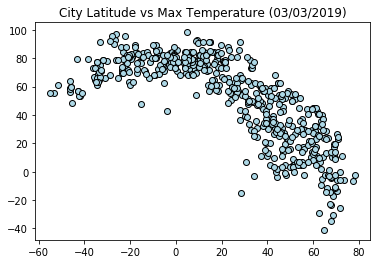

In [18]:
lat_temp_data = weather_df.groupby('city').mean()
y_axis = lat_temp_data['max temperature']
x_axis = lat_temp_data['latitude']
plt.scatter(x_axis, y_axis, color='lightblue', edgecolor='black')
plt.title("City Latitude vs Max Temperature (03/03/2019)")
plt.show()